## Step 1: Import and Load Data

In [1]:
import pandas as pd

# Load raw stock data
data = pd.read_csv('../data/raw/AAPL_stock.csv', skiprows=2)
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

data.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
1,2015-01-06,23.606550,23.866475,23.244431,23.668754,263188400
2,2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
3,2015-01-08,24.857307,24.915069,24.148621,24.266367,237458000
4,2015-01-09,24.883963,25.159439,24.484077,25.030586,214798000


## Step 2: Check for Missing Values

In [2]:
data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

## Step 3: Convert 'Date' Column to Datetime and Set Index

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
2015-01-06,23.606550,23.866475,23.244431,23.668754,263188400
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
2015-01-08,24.857307,24.915069,24.148621,24.266367,237458000
2015-01-09,24.883963,25.159439,24.484077,25.030586,214798000


## Step 4: Visualize Closing Price

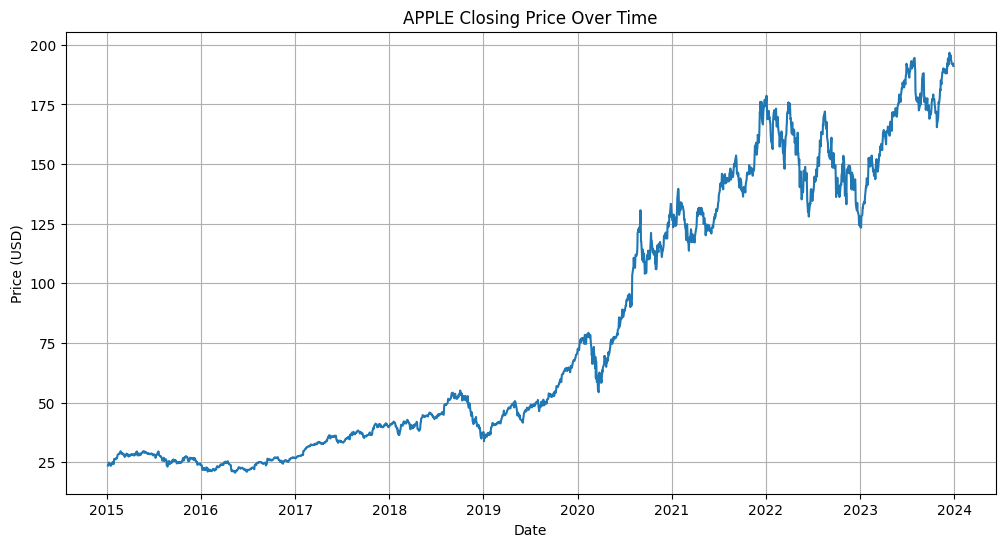

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('APPLE Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

## Step 5: Plot ACF and PACF

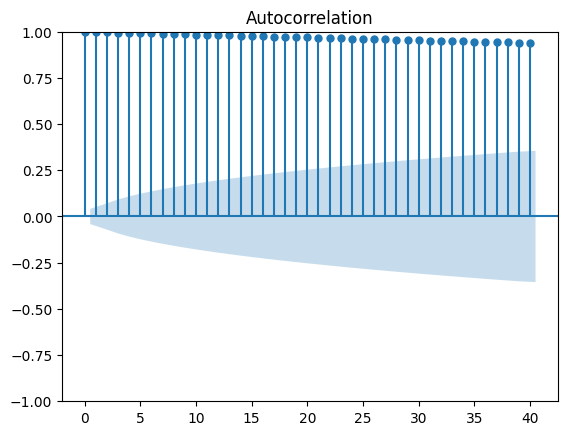

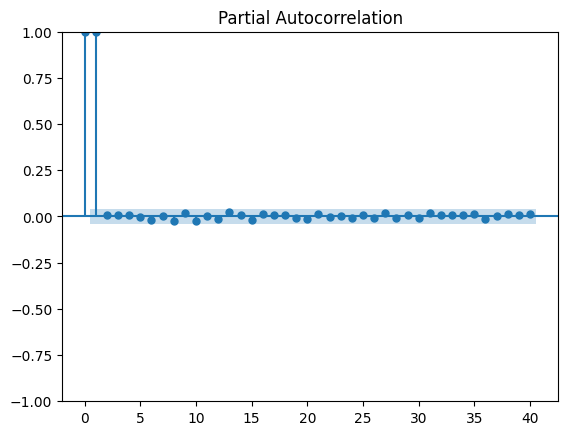

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Close'], lags=40)
plt.show()

plot_pacf(data['Close'], lags=40)
plt.show()

## Step 6: Check Stationarity (ADF Test)

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.24035570905782394
p-value: 0.9744363327150544


In [7]:
# First-order differencing to remove trend
data_diff = data['Close'].diff().dropna()

# Check ADF again
result_diff = adfuller(data_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])


ADF Statistic (Differenced): -10.918320664017706
p-value (Differenced): 1.0535863563895933e-19


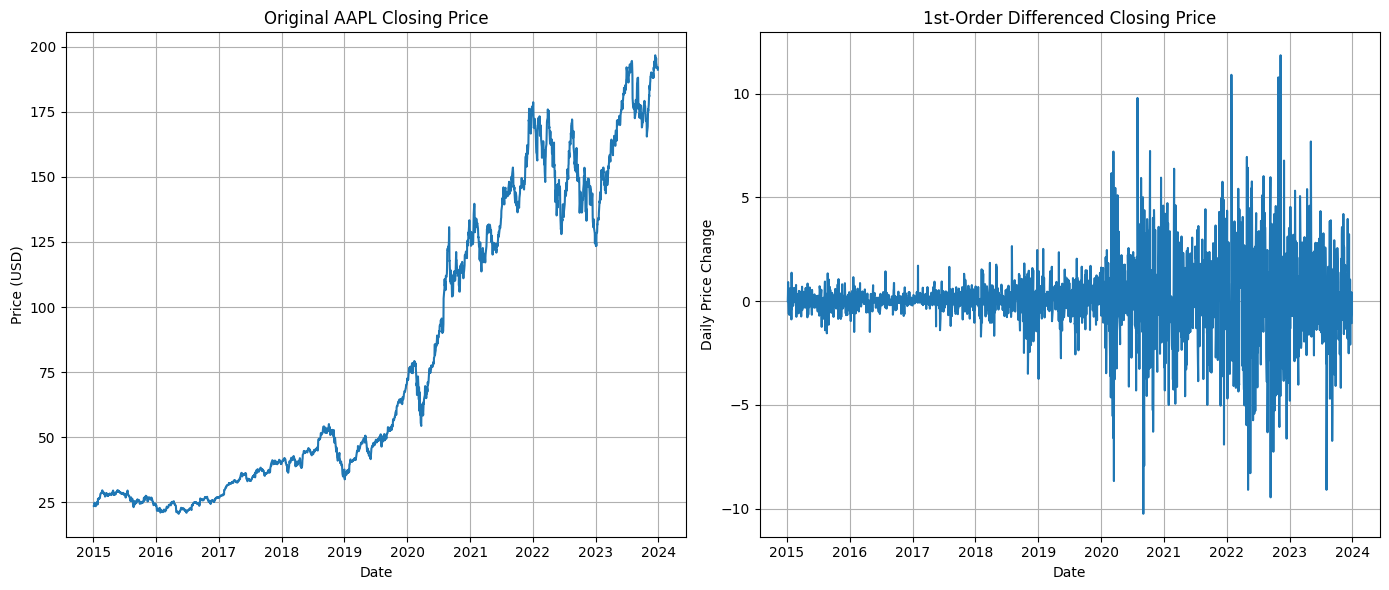

In [14]:
import matplotlib.pyplot as plt

# First-order differencing
data_diff = data['Close'].diff().dropna()

# Plot original vs differenced closing price
plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
plt.grid(True)
plt.plot(data['Close'])
plt.title('Original AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Differenced
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(data_diff)
plt.title('1st-Order Differenced Closing Price')
plt.xlabel('Date')
plt.ylabel('Daily Price Change')

plt.tight_layout()
plt.show()


## ✅ Summary
- Loaded and cleaned AAPL stock data
- Confirmed no missing values
- Converted 'Date' to datetime and set as index
- Visualized long-term trend in closing price
- Used ACF & PACF to assess autocorrelation and lags
- Found original series was non-stationary (p = 0.97)
- Applied differencing — series became stationary (p ≈ 0)
